In [1]:
# importing needed modules
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### OOP FOR MLR
This notebook will illustrate how the funtions or classes will perform their objectives by calculating errors and plotting graphs.   

In [2]:
class ErrorCalculator:

    def __init__(self, y, y_pred):
        self.y_pred = np.array(y_pred)
        self.y = np.array(y)
    def check_size(self, y, y_pred):
        if len(self.y)== len(self.y_pred):
            return True
        else:
            raise ValueError(f'damn bro. size {self.y} and {self.y_pred}')     
        
    def get_residuals(self):
        return self.y - self.y_pred

    def get_standardised_residuals(self):
        self.stand_res = (self.y - self.y_pred) / (self.y_pred)**(0.5)
        return self.stand_res

    def get_mse(self):
        self.mse = MSE(self.y, self.y_pred)
        return self.mse  

    def get_rmse(self):
        self.rmse = MSE(self.y, self.y_pred)**(0.5)
        return self.rmse

    def error_summary(self):
        stand_resid_min = min(self.get_standardised_residuals())
        stand_resid_max = max(self.get_standardised_residuals())
        rmse = (self.get_rmse())
        mse = (self.get_mse())
        print(f'standard residual min: {stand_resid_min}')
        print(f'standard residual max: {stand_resid_max}')
        print(f'rmse: {rmse}')
        print(f'mse: {mse}')

In [3]:
o = [7,50,13]
p = [4,20,9]
ec = ErrorCalculator(o, p)
ec.get_residuals()

array([ 3, 30,  4])

In [4]:
ec.get_standardised_residuals()

array([1.5       , 6.70820393, 1.33333333])

In [5]:
print(f'mse: {round(ec.get_mse(), 2)}')

mse: 308.33


In [6]:
print(f'rmse: {round(ec.get_rmse(), 2)}')

rmse: 17.56


In [7]:
ec.error_summary()

standard residual min: 1.3333333333333333
standard residual max: 6.7082039324993685
rmse: 17.55942292142123
mse: 308.3333333333333


In [8]:
class Plotter:
    def __init__(self, y, y_pred, resid=None):
        self.resid = resid
        self.y = y
        self.y_pred = y_pred

    def run_calculations(self):
        resids = np.array(self.y) - np.array(self.y_pred)
        return resids

    def plot(self):
        if self.resid is None:
            self.run_calculations()
        sns.set()    
        plt.hist(self.run_calculations())
        plt.title('Distribution of residuals')
        plt.xlabel('Residuals')
        plt.ylabel('Distribution')

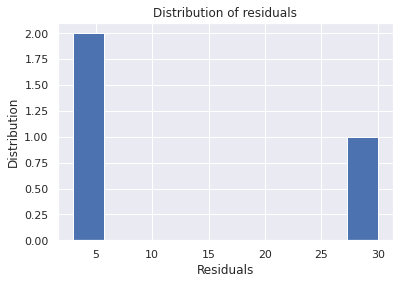

In [9]:
plot = Plotter(o, p)
plot.plot()

In [10]:
class HistogramPlotter(Plotter):
    def __init__(self, y, y_pred):
        super().__init__(y, y_pred)

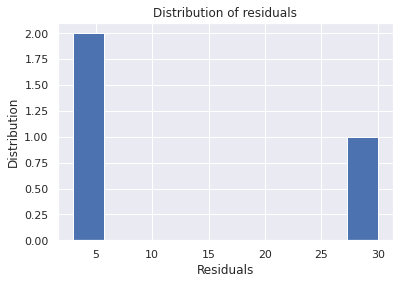

In [11]:
hp = HistogramPlotter(o, p)
hp.plot()

In [12]:
class ScatterPlotter(Plotter):
    def __init__(self, y, y_pred):
        super().__init__(y, y_pred)

    def scatter(self):
        pt = pd.DataFrame({"y_test": self.y, "y_pred": self.y_pred})
        pt.plot.scatter(x='y_test', y='y_pred')
        plt.xlabel('Observed values')
        plt.ylabel('predicted values')
        plt.title('Observed values vs predicted values')

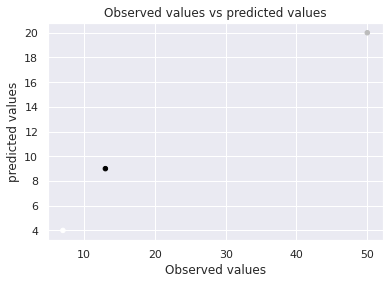

In [13]:
sp = ScatterPlotter(o, p)
sp.scatter()